In [7]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

### Definindo os exemplos

In [8]:
# Exemplos.
X = np.array([
    [0.3, 1.8],[0.5, 2.5],[0.1, 3],[0.75, 3.5],[1, 2.8],[1.5, 3.25],[2.3, 3.7],
    [0.5, 0.5],[0.75, 1.2],[1, 0.5],[1.2, 1.3],[1.7, 0.9],[2, 1],[1.7, 2],[2.8, 0.5],[2.7, 1.7],[2.2, 2.5],[2.9, 3.1],[3.2, 3.5],[3.3, 2.7],
])

# Classes ao que os exemplos pertencem.
y = np.array([1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2])

### Mostrando as classes.

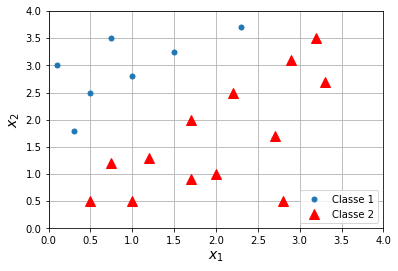

In [9]:
axis1 = np.argwhere(y==1)
axis2 = np.argwhere(y==2)

plt.plot(X[axis1,0],X[axis1,1], '.', markersize=10, label='Classe 1')
plt.plot(X[axis2,0],X[axis2,1], 'r^', markersize=10, label='Classe 2')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.grid()
plt.xlim([0,4])
plt.ylim([0,4])
plt.legend()
plt.show()

### Classificando

In [10]:
def predict(X):
    N = X.shape[0]
    y_pred = np.zeros((N,))
    for i in range(0, N):
        # Acesse os valores de cada um dos 2 atributos.
        x1 = X[i,0]
        x2 = X[i,1]

        # Função discriminante.
        g = 1 + x1 - x2

        # Eu escolhi atribuir g == 0 à classe 1, mas poderia ser a 2.
        if(g <= 0):
            y_pred[i] = 1
        elif(g > 0):
            y_pred[i] = 2

    return y_pred
    

# realizando a predição.
y_pred = predict(X)

### Calculando o erro

In [11]:
error = 0
acc = 0
for i in range(0, len(y)):
    if(y_pred[i] != y[i]):
        error += 1
    else:
        acc += 1
        
print('Erro de predição:', error)
print('Precisão de predição:',(1-error))

Erro de predição: 0
Precisão de predição: 1


### Mostrando as regiões de decisão

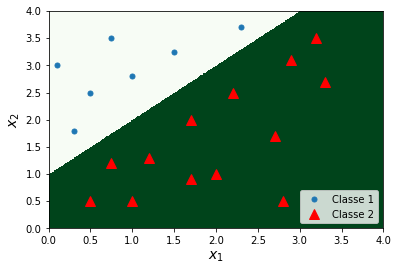

In [12]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = 0, 4
y_min, y_max = 0, 4
h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Greens, shading='auto')
# Plot also the training points
plt.plot(X[axis1,0],X[axis1,1], '.', markersize=10, label='Classe 1')
plt.plot(X[axis2,0],X[axis2,1], 'r^', markersize=10, label='Classe 2')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(0, 4)
plt.ylim(0, 4)

plt.legend()
plt.show()